# Parsing Dates

Another common data transformation involves parsing dates. Parsing generally means that you start with a string and then transform that string into a different data type. In this case, that means taking a date in the format of a string and transforming the string into a date type. Run the next cell to see an example.

In [1]:
import pandas as pd
import numpy as np

parsed_date = pd.to_datetime('January 1st, 2017')
parsed_date

Timestamp('2017-01-01 00:00:00')

In [2]:
parsed_date.month

1

In [3]:
parsed_date.year

2017

In [4]:
parsed_date.second

0

Sometimes date string are formatted in unexpected ways. For example, in the United States, dates are given with the month first and then the day. That is what pandas expects by default. However, some countries write the date with the day first and then the month. Run the next three examples to see Panda's default behavior and how you can specify the date formatting.

In [5]:
parsed_date = pd.to_datetime('5/3/2017 5:30')
parsed_date.month

5

In [6]:
parsed_date = pd.to_datetime('3/5/2017 5:30', format='%d/%m/%Y %H:%M')
parsed_date.month

5

In [7]:
parsed_date = pd.to_datetime('5/3/2017 5:30', format='%m/%d/%Y %H:%M')
parsed_date.month

5

The formatting abbreviations are actually part of the python standard. You can see examples at [this link](http://strftime.org/).

# Part 1 - Practice Parsing Dates

Run the code cells below to import the World Bank projects data. The last line of the code outputs all of the column names in the data frame.

In [8]:
# Run this code cell. Read in the projects data set with all columns type string
df_projects = pd.read_csv('./data/projects_data.csv', dtype=str)
df_projects.drop(['Unnamed: 56'], axis=1, inplace=True)
df_projects.columns

Index(['id', 'regionname', 'countryname', 'prodline', 'lendinginstr',
       'lendinginstrtype', 'envassesmentcategorycode', 'supplementprojectflg',
       'productlinetype', 'projectstatusdisplay', 'status', 'project_name',
       'boardapprovaldate', 'board_approval_month', 'closingdate',
       'lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt',
       'borrower', 'impagency', 'url', 'projectdoc ', 'majorsector_percent ',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector5', 'sector',
       'mjsector1', 'mjsector2', 'mjsector3', 'mjsector4', 'mjsector5',
       'mjsector', 'theme1', 'theme2', 'theme3', 'theme4', 'theme5', 'theme ',
       'goal', 'financier', 'mjtheme1name', 'mjtheme2name', 'mjtheme3name',
       'mjtheme4name', 'mjtheme5name', 'location', 'GeoLocID', 'GeoLocName',
       'Latitude', 'Longitude', 'Country'],
      dtype='object')

Notice there are three columns associated with dates: boardapprovaldate, board_approval_month, and closingdate. Run the code cell below to see what these values look like.

In [9]:
# Run this code cell
df_projects.head(15)[['boardapprovaldate', 'board_approval_month', 'closingdate']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   boardapprovaldate     15 non-null     object
 1   board_approval_month  15 non-null     object
 2   closingdate           9 non-null      object
dtypes: object(3)
memory usage: 488.0+ bytes


Use the pandas to_datetime method to convert the boardapprovaldate and closingdate columns into datetime objects.

In [10]:
df_projects['boardapprovaldate']

0        2018-06-28T00:00:00Z
1        2018-06-28T00:00:00Z
2        2018-06-28T00:00:00Z
3        2018-06-27T00:00:00Z
4        2018-06-27T00:00:00Z
                 ...         
18243    1948-03-25T00:00:00Z
18244    1947-08-28T00:00:00Z
18245    1947-08-22T00:00:00Z
18246    1947-08-07T00:00:00Z
18247    1947-05-09T00:00:00Z
Name: boardapprovaldate, Length: 18248, dtype: object

In [11]:
# TODO: Use the pandas to_datetime method to convert these two columns 
#   (boardapprovaldate, closingdate) into date times.

df_projects['boardapprovaldate'] = pd.to_datetime(df_projects['boardapprovaldate'])
df_projects['closingdate'] = pd.to_datetime(df_projects['closingdate'])

In [12]:
# Run the code cells below to see how you can access the different parts of the datetime objects
# Series.dt gives access to the datetime object as explained here: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.html
df_projects['boardapprovaldate'].dt.second[:5]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: boardapprovaldate, dtype: float64

In [13]:
# Run this code cell to see the output
df_projects['boardapprovaldate'].dt.month[:5]

0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: boardapprovaldate, dtype: float64

In [14]:
# Run this code to see the output
# weekday represents the day of the week from 0 (Monday) to 6 (Sunday).
df_projects['boardapprovaldate'].dt.weekday[:5]

0    3.0
1    3.0
2    3.0
3    2.0
4    2.0
Name: boardapprovaldate, dtype: float64

# Part 2 - Create new columns

Now that the boardapprovaldate and closingdates are in datetime formats, create a few new columns in the df_projects data frame:
* approvalyear
* approvalday
* approvalweekday
* closingyear
* closingday
* closingweekday

In [15]:
df_projects[['boardapprovaldate', 'closingdate']].head(3)

,boardapprovaldate,closingdate
0,2018-06-28 00:00:00+00:00,NaT
1,2018-06-28 00:00:00+00:00,2023-12-31 00:00:00+00:00
2,2018-06-28 00:00:00+00:00,NaT


In [16]:
### 
# TODO create the follwing new columns in the df_projects data frame
#
# approvalyear
# approvalday
# approvalweekday
# closingyear
# closingday
# closingweekday
#
#
###

df_projects['approvalyear'] = df_projects['boardapprovaldate'].dt.year
df_projects['approvalday'] = df_projects['boardapprovaldate'].dt.day
df_projects['approvalweekday'] = df_projects['boardapprovaldate'].dt.weekday
df_projects['closingyear'] = df_projects['closingdate'].dt.year
df_projects['closingday'] = df_projects['closingdate'].dt.day
df_projects['closingweekday'] = df_projects['closingdate'].dt.weekday

# Part 3 (Challenge)

Use what you've practiced in this exercise to make a visualization of year on the x-axis and the sum of the totalamt columns per year on the y-axis. 

Open this cell for hints!
```{toggle} You'll first need to clean the totalamt column to get rid of commas and convert the values to numeric. Then you'll need to use pandas' groupby method to sum the totalamt column for each year. 
```

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# Remove ',' and transform into float
df_projects['totalamt'] = df_projects['totalamt'].str.replace(',', '').astype(float)

# Change unit to million 
df_projects['totalamt_mil'] = df_projects['totalamt'] / 1000000 

In [19]:
# Construct table for total amount by year
totalamt_yearly = df_projects.groupby('approvalyear').sum()['totalamt_mil']

In [20]:
# Change index dtype from float to string
totalamt_yearly.index = totalamt_yearly.index.astype('int')

In [21]:
# ticks for the plot
loc = [idx for idx in range(0, len(totalamt_yearly.index), 5)]
labels = [totalamt_yearly.index[i] for i in loc]

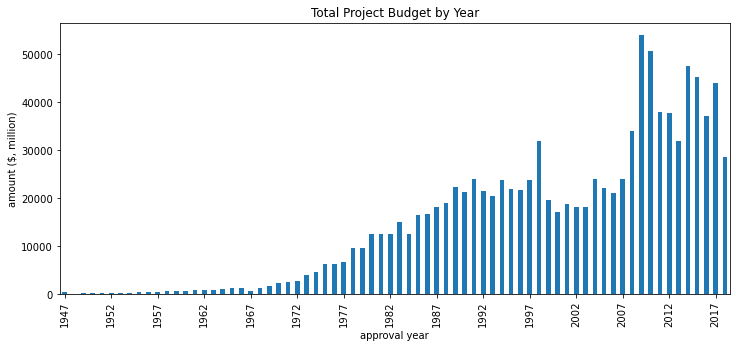

In [24]:
totalamt_yearly.plot.bar(x='approvalyear', y='totalamt_mil', figsize=(12,5))

plt.title('Total Project Budget by Year')
plt.xlabel('approval year')
plt.ylabel('amount ($, million)')

plt.xticks(loc, labels)

plt.show()

# Conclusion

Parsing dates is a common task data transformation task. This is true not just with pandas but with other data systems like [SQL](http://www-db.deis.unibo.it/courses/TW/DOCS/w3schools/sql/sql_dates.asp.html).